In [ ]:
import numpy as np
import time

from agglio_lib import AG_GD, AG_SGD
from agglio_lib import sigmoid, getData

In [ ]:
n = 1000
d=50
w_radius = 10
wAst = np.random.randn(d,1)
X = getData(0, 1, n, d)/np.sqrt(d)
w0 =w_radius*np.random.randn(d,1)/np.sqrt(d)
y = sigmoid(np.matmul(X, wAst))

B_step_list=np.linspace(1.01,2, num=5)

In [ ]:
B_step_list

array([1.01  , 1.2575, 1.505 , 1.7525, 2.    ])

In [ ]:
#AGGLIO-GD
l2_agd=[]

for B_step in B_step_list:
    agd = AG_GD(alpha= 350, B_init=0.1, B_step=B_step )
    agd.fit( X, y.ravel(), w_init = w0.ravel(), w_star = wAst.ravel(), max_iter=600 )
    l2_agd.append(agd.distVals[-1])  

In [ ]:
#AGGLIO-SGD
l2_agsgd=[]

for B_step in B_step_list:
    agsgd = AG_SGD(alpha= 350, B_init=0.1, B_step=B_step)
    agsgd.fit( X, y.ravel(), w_init = w0.ravel(), w_star = wAst.ravel(), max_iter=600, minibatch_size=200 )
    l2_agsgd.append(agsgd.distVals[-1])

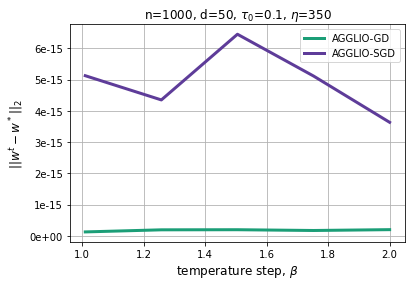

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

y_fmt = ticker.FormatStrFormatter('%2.0e')
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(y_fmt)

plt.plot(B_step_list, l2_agd, label='AGGLIO-GD', color='#1b9e77', linewidth=3)
plt.plot(B_step_list, l2_agsgd, label='AGGLIO-SGD', color='#5e3c99', linewidth=3)
plt.legend()
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)
plt.xlabel(r"temperature step, $\beta$",fontsize=12)
plt.grid()
plt.title(r"n=1000, d=50, $\tau_0$=0.1, $\eta $=350" )
plt.savefig('temperature_step_ablation.pdf', dpi=300, bbox_inches = 'tight')
plt.show()